In [1]:
import torch
import numpy as np

In [2]:
# define a numpy ndarray
numpy_tensor = np.random.randn(10,20)

In [8]:
numpy_tensor.shape

(10, 20)

In [13]:
# transfer numpy to torch
torch_tensor1 = torch.Tensor(numpy_tensor)
torch_tensor2 = torch.from_numpy(numpy_tensor)

In [17]:
# transfer torch to numpy
numpy_array = torch_tensor1.numpy() # if is on cpu
# numpy_array = torch_tensor1.cpu().numpy() # if is on GPU
# tensor cannot transfer to numpy if is on gpu, you must transfer to cpu first

In [22]:
torch_tensor1.dim()

2

In [23]:
torch_tensor1.type()

'torch.FloatTensor'

In [25]:
torch_tensor1.numel()

200

In [47]:
# exericise
x = torch.randn(3,2)
x = x.type(torch.DoubleTensor)
x_array = x.numpy()
print(x_array.dtype)

float64


In [48]:
x = torch.ones(2,2)

In [54]:
x = torch.randn(4,3)

In [55]:
print(x)

tensor([[-0.2508, -0.8794, -0.2288],
        [-0.0044, -0.5530,  0.6951],
        [-1.4951, -0.7741, -0.7315],
        [-0.4224, -0.4478,  0.1825]])


In [69]:
# get max and min
max_value, max_index = torch.max(x,dim=1)

In [70]:
print(max_value)
print(max_index)

tensor([-0.2288,  0.6951, -0.7315,  0.1825])
tensor([2, 2, 2, 2])


In [73]:
# get sum of x
sum_x = torch.sum(x,dim=1)
print(sum_x)

tensor([-1.3590,  0.1377, -3.0007, -0.6876])


In [75]:
# add dimension
print(x.shape)
x = x.unsqueeze(0)
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [77]:
x = x.unsqueeze(1)
print(x.shape)

torch.Size([1, 1, 4, 3])


In [79]:
# reduce dimension
x = x.squeeze(0)
x.shape

torch.Size([1, 4, 3])

In [82]:
x = x.squeeze() # reduce all dim
x.shape

torch.Size([4, 3])

In [91]:
x = torch.randn(3,4,5)
print(x.shape)

torch.Size([3, 4, 5])


In [107]:
x = x.permute(1,0,2) # reorder dim 
print(x.shape)
x = x.transpose(0,2) # switch dim
print(x.shape) 

torch.Size([3, 4, 5])
torch.Size([5, 4, 3])


In [110]:
# view can use to reshape tensor
x = torch.randn(3,4,5)
print(x.shape)

x = x.view(-1,5) # -1 means random dim, 5 means second dim is 5
print(x.shape)

x = x.view(3,20) # re shape to 3x20
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


In [116]:
x = torch.randn(3,3)
y = torch.randn(3,3)
z = x + y
print(x)
print(y)
print(z)

tensor([[-1.3657, -1.3020,  1.2477],
        [-0.5706, -0.3902,  0.1070],
        [-0.3458,  0.6335,  1.1375]])
tensor([[ 0.3790, -0.4331, -1.0593],
        [ 0.4093, -1.5421, -0.3548],
        [-1.0418,  0.6036, -0.5606]])
tensor([[-0.9867, -1.7352,  0.1883],
        [-0.1613, -1.9324, -0.2478],
        [-1.3876,  1.2371,  0.5769]])


In [121]:
# inplace can directly work on tensor instead create a new space
x = torch.ones(3,3)
print(x.shape) # 3x3

# unsqueeze, add one dim
x.unsqueeze_(0)
print(x.shape)

# transpose for inplace
x.transpose_(1,0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])


In [163]:
x = torch.ones(3,3)
y = torch.ones(3,3)

# add for inplace
x.add_(y)
print(x)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [164]:
# create a float32, 4x4 with value 1 matrix, make mid part of 2x2 matrix with value 2
x = torch.ones(4,4)
x[1:3,1:3] = 2
print(x)

tensor([[1., 1., 1., 1.],
        [1., 2., 2., 1.],
        [1., 2., 2., 1.],
        [1., 1., 1., 1.]])


In [165]:
# Variable library, variable can be used to gradient and any computing
from torch.autograd import Variable

In [166]:
# define x and y
x_tensor = torch.randn(10,5)
y_tensor = torch.randn(10,5)

# change x and y to Variable
x = Variable(x_tensor,requires_grad = True) # default is False for gradient computing
y = Variable(y_tensor,requires_grad = True)

In [167]:
x_tensor

tensor([[ 0.4727,  0.0637, -0.2291,  0.6896, -2.1302],
        [-0.3594,  0.2741,  0.5791, -0.4704, -0.6463],
        [-0.2596, -0.4783,  0.5116, -0.1030, -0.8699],
        [ 1.5703,  1.1274,  1.2559, -2.1634, -0.0763],
        [-0.9509, -1.7101,  0.5416, -0.1345, -0.8268],
        [ 1.3830,  0.4051,  0.4051, -0.4933, -1.2775],
        [-1.1551,  1.4249, -1.1194, -0.3202, -0.3122],
        [-1.5247, -1.6821, -0.5349,  0.1374,  1.6493],
        [-0.7931,  0.0909,  0.0120, -2.3522,  0.4346],
        [-1.7045,  0.9004,  0.6871, -0.7136, -0.2776]])

In [168]:
x

tensor([[ 0.4727,  0.0637, -0.2291,  0.6896, -2.1302],
        [-0.3594,  0.2741,  0.5791, -0.4704, -0.6463],
        [-0.2596, -0.4783,  0.5116, -0.1030, -0.8699],
        [ 1.5703,  1.1274,  1.2559, -2.1634, -0.0763],
        [-0.9509, -1.7101,  0.5416, -0.1345, -0.8268],
        [ 1.3830,  0.4051,  0.4051, -0.4933, -1.2775],
        [-1.1551,  1.4249, -1.1194, -0.3202, -0.3122],
        [-1.5247, -1.6821, -0.5349,  0.1374,  1.6493],
        [-0.7931,  0.0909,  0.0120, -2.3522,  0.4346],
        [-1.7045,  0.9004,  0.6871, -0.7136, -0.2776]], requires_grad=True)

In [169]:
y

tensor([[-0.8602, -0.3411,  1.0652, -0.6661, -1.1706],
        [ 0.9351, -0.9966,  0.6410, -0.7332, -1.2258],
        [ 1.1715, -1.7650, -0.7591, -0.4730,  1.1200],
        [-0.7105, -1.2147, -0.3688,  1.1422,  0.1505],
        [-0.4192,  0.0625, -1.2031, -1.2069, -0.2593],
        [-0.2950, -0.5327, -0.3907, -2.2477,  0.5372],
        [-0.4541,  0.0844, -0.5512,  1.1125,  0.1434],
        [ 0.2408, -0.8233,  1.3704, -0.7477,  1.8917],
        [ 0.2736, -0.2629,  1.8906, -1.2552, -0.1332],
        [-0.7827, -1.4135, -0.0455, -1.1077, -0.5811]], requires_grad=True)

In [170]:
x+y

tensor([[-0.3876, -0.2774,  0.8362,  0.0235, -3.3008],
        [ 0.5757, -0.7226,  1.2201, -1.2036, -1.8720],
        [ 0.9119, -2.2433, -0.2475, -0.5760,  0.2501],
        [ 0.8598, -0.0873,  0.8870, -1.0212,  0.0742],
        [-1.3702, -1.6476, -0.6615, -1.3414, -1.0861],
        [ 1.0880, -0.1276,  0.0144, -2.7410, -0.7403],
        [-1.6091,  1.5093, -1.6706,  0.7923, -0.1688],
        [-1.2838, -2.5054,  0.8355, -0.6103,  3.5410],
        [-0.5195, -0.1719,  1.9026, -3.6073,  0.3014],
        [-2.4872, -0.5132,  0.6416, -1.8213, -0.8587]], grad_fn=<AddBackward0>)

In [171]:
z = torch.sum(x+y)

In [172]:
print(z.data)
print(z.grad_fn)

tensor(-23.2174)


In [173]:
# find gradient of x and y
z.backward()

In [176]:
print(x.grad)
print(y.grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


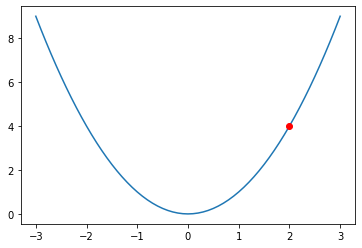

In [182]:
# create a function y = x^2 and find the gradient of y
import matplotlib.pyplot as plt
x = np.arange(-3,3.01,0.1)
y = x**2
plt.plot(x,y)
plt.plot(2,4,'ro')
plt.show()

In [215]:
x = Variable(torch.FloatTensor([2]), requires_grad = True)
y = x**2
y.backward()
print(x.grad)
print(y.grad_fn)

tensor([4.])
